In [2]:
# Importing required packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.figure
import matplotlib.pyplot as plt


plt.style.use('seaborn')

In [3]:
data = pd.read_csv(
        "202102.csv",
        dtype = {
            'start_station_id': pd.Int64Dtype(),
            'end_station_id' : pd.Int64Dtype()
            })

# Use data.info() instead

In [12]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42301 entries, 1 to 48648
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ride_id             42301 non-null  object        
 1   rideable_type       42301 non-null  object        
 2   start_time          42301 non-null  datetime64[ns]
 3   end_time            42301 non-null  datetime64[ns]
 4   trip_duration       42301 non-null  int64         
 5   start_station_id    42131 non-null  Int64         
 6   start_station_name  42301 non-null  object        
 7   end_station_id      42125 non-null  Int64         
 8   end_station_name    42301 non-null  object        
 9   user_type           42301 non-null  object        
dtypes: Int64(2), datetime64[ns](2), int64(1), object(5)
memory usage: 16.8 MB


In [13]:
data.memory_usage(deep=True)

Index                  338408
ride_id               3087973
rideable_type         2924498
start_time             338408
end_time               338408
trip_duration          338408
start_station_id       380709
start_station_name    3415350
end_station_id         380709
end_station_name      3417267
user_type             2664963
dtype: int64

In [15]:
data['ride_id'].factorize?

Object `factorize` not found.


In [6]:
# Remove columns without data, since these data are only available on 2013-2019
data.drop(['bike_id', 'gender', 'birth_year'], axis = 1, inplace = True)
data.head()

,ride_id,rideable_type,start_time,end_time,trip_duration,start_station_id,start_station_name,end_station_id,end_station_name,user_type
0,19A112436EC92A7E,classic_bike,2021-02-01 00:55:44,2021-02-01 10:44:58,35354,322,Kimbark Ave & 53rd St,<NA>,NaN,member
1,05A7BDE8A0D909FC,electric_bike,2021-02-01 01:07:04,2021-02-01 01:47:45,2441,498,California Ave & Fletcher St,455,Maplewood Ave & Peterson Ave,casual
2,CAC54BCCD36F6B15,electric_bike,2021-02-01 01:15:19,2021-02-01 01:22:48,449,192,Canal St & Adams St,<NA>,NaN,member
3,B12AD1843BE99A2C,classic_bike,2021-02-01 01:56:22,2021-02-01 01:59:23,181,192,Canal St & Adams St,107,Desplaines St & Jackson Blvd,member
4,A62978A16B1FFE79,classic_bike,2021-02-01 01:59:41,2021-02-01 02:21:23,1302,638,Clinton St & Jackson Blvd,172,Rush St & Cedar St,member


In [7]:
# Converting objects to datetime
data[['start_time', 'end_time']] = data[['start_time', 'end_time']].apply(pd.to_datetime, format = '%Y-%m-%d %H:%M:%S')
data.dtypes

ride_id                       object
rideable_type                 object
start_time            datetime64[ns]
end_time              datetime64[ns]
trip_duration                  int64
start_station_id               Int64
start_station_name            object
end_station_id                 Int64
end_station_name              object
user_type                     object
dtype: object

In [8]:
# Removing rows where station names are nulls
data.dropna(subset = ['start_station_name', 'end_station_name'], inplace = True)
print('The number of nulls on station name columns\n')
print(data[['start_station_name', 'end_station_name']].isnull().sum())

The number of nulls on station name columns

start_station_name    0
end_station_name      0
dtype: int64


In [7]:
date = data['start_time']
casual = data[data['user_type'] == 'casual']
member = data[data['user_type'] == 'member']

a = data.groupby(
    pd.Grouper(
        key = 'start_time', 
        axis = 0,
        freq = 'D',
        sort = True
    )).size()

a2 = casual.groupby(
    pd.Grouper(
        key = 'start_time', 
        axis = 0,
        freq = 'D',
        sort = True
    )).size()

a3 = member.groupby(
    pd.Grouper(
        key = 'start_time', 
        axis = 0,
        freq = 'D',
        sort = True
    )).size()

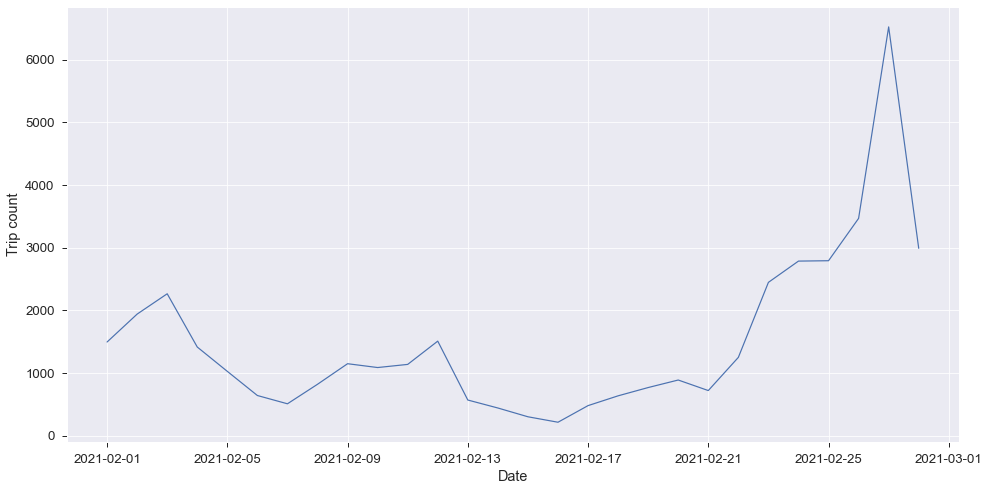

Text(0, 0.5, 'Trip count')

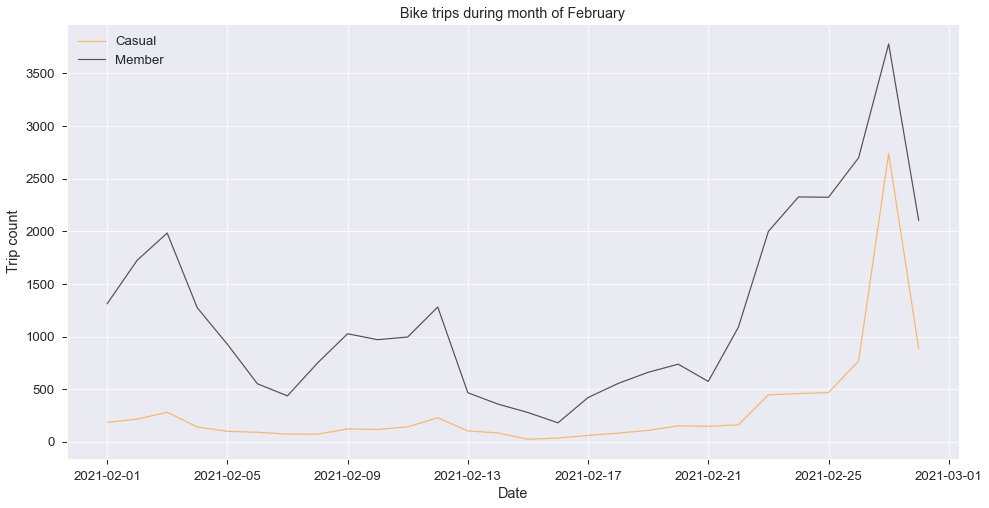

In [14]:
# 1st plot
plt.figure(figsize = (16, 8))

plt.plot(a)
plt.xlabel('Date')
plt.ylabel('Trip count')

plt.show()

# 2nd plot
plt.figure(figsize = (16, 8))

plt.plot(a2, color = '#f9b665', label = 'Casual')
plt.plot(a3, color = '#59504e', label = 'Member')

plt.title('Bike trips during month of February')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Trip count')




In [ ]:
data['user_type'].value_counts().plot(kind = 'bar', figsize = (18,6))

In [ ]:
data['user_type'].value_counts().plot(kind = 'pie', figsize = (6, 6))

In [ ]:
users = data['user_type'].value_counts()

ax = data[['duration', 'rideable_type']].boxplot(by = 'rideable_type', figsize = (10,6))
ax.set_ylabel('Trip Duration')

In [ ]:
t1 = data['start_time']
t2 = data['end_time']

data['duration'] = (t2-t1)
data['duration'] = data['duration'].astype('timedelta64[s]')
data['duration'] = data['duration'].astype('int32')

In [ ]:
print(pd.Series({"Memory usage": "{:.4f} MB".format(data.memory_usage().sum()/(1024*1024)),
                 "Dataset shape": "{}".format(data.shape)}).to_string())

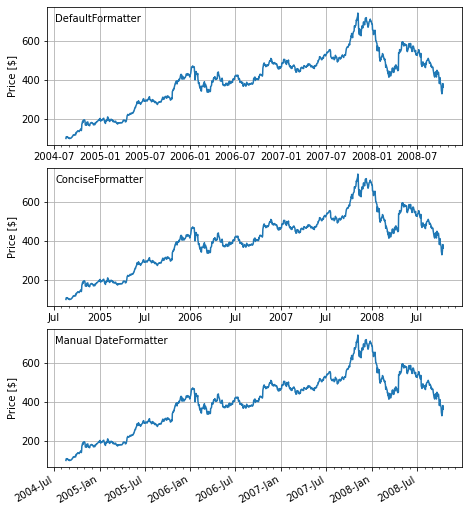

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, high,
# low, close, volume, adj_close from the mpl-data/sample_data directory. The
# record array stores the date as an np.datetime64 with a day unit ('D') in
# the date column.
df = cbook.get_sample_data('goog.npz', np_load=True)['price_data']

fig, axs = plt.subplots(3, 1, figsize=(6.4, 7), constrained_layout=True)
# common to all three:
for ax in axs:
    ax.plot('date', 'adj_close', data = df)
    # Major ticks every half year, minor ticks every month,
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.grid(True)
    ax.set_ylabel(r'Price [\$]')

# different formats:
ax = axs[0]
ax.set_title('DefaultFormatter', loc='left', y=0.85, x=0.02, fontsize='medium')

ax = axs[1]
ax.set_title('ConciseFormatter', loc='left', y=0.85, x=0.02, fontsize='medium')
ax.xaxis.set_major_formatter(
    mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

ax = axs[2]
ax.set_title('Manual DateFormatter', loc='left', y=0.85, x=0.02,
             fontsize='medium')
# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

plt.show()

In [1]:
import pandas as pd

pd.merge?

Signature:
pd.merge(
    left: 'DataFrame | Series',
    right: 'DataFrame | Series',
    how: 'str' = 'inner',
    on: 'IndexLabel | None' = None,
    left_on: 'IndexLabel | None' = None,
    right_on: 'IndexLabel | None' = None,
    left_index: 'bool' = False,
    right_index: 'bool' = False,
    sort: 'bool' = False,
    suffixes: 'Suffixes' = ('_x', '_y'),
    copy: 'bool' = True,
    indicator: 'bool' = False,
    validate: 'str | None' = None,
) -> 'DataFrame'
Docstring:
Merge DataFrame or named Series objects with a database-style join.

A named Series object is treated as a DataFrame with a single named column.

The join is done on columns or indexes. If joining columns on
columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
on indexes or indexes on a column or columns, the index will be passed on.
When performing a cross merge, no column specifications to merge on are
allowed.

.. warning::

    If both key columns contain rows where the key is a null